# Лабораторная  работа №2 по курсу "Методы и средства передачи информации"

_Выполнил студент группы А-07-18 Востриков Роман_

In [2]:
import ipywidgets as widgets # элементы интерактивного пользовательского интерфейса
import numpy as np # вычисления
import matplotlib.pyplot as plt # построение графиков
from scipy import signal # функции для получения сигналов

## Задача №1
Выполнить преобразование Фурье для функции:
![title](func.png)
Период функции $T=2\pi$

$a_0 = 1$

$a_m=0$

$b_m=\frac{(-1)^m+1}{\pi m}$

1. Проверить формулы.
2. Составить программу, которая вычисляет разложение функции $f(x)$ для различных m определить  максимальную разность между значениями функции $f(x)$ и c помощью  разложения Фурье.
3. Построить график при различных m сравнить визуально схожесть графиков исходной функции и разложения Фурье.

### Решение

#### Проверим формулы:
1. $$a_0=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)dx=\frac{1}{\pi}\int_{-\pi}^{0}0dx+\frac{1}{\pi}\int_{0}^{\pi}1dx=\frac{1}{\pi}\cdot\pi=1$$
2. $$a_m=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos mxdx=\frac{1}{\pi}\int_{-\pi}^{0}0\cos mxdx+\frac{1}{\pi}\int_{0}^{\pi}1\cos m xdx= \frac{1}{\pi n}\sin mx|_0^\pi=0\: при\: m>0$$
3. $$b_m=\frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin mxdx=\frac{1}{\pi}\int_{-\pi}^{0}0\sin mxdx+\frac{1}{\pi}\int_{0}^{\pi}1\sin m xdx= -\frac{1}{\pi n}\cos mx|_0^\pi=-\frac{1}{\pi m}(\cos m\pi - \cos 0)=-\frac{1}{\pi m}((-1)^m-1)=\frac{(-1)^{m+1}+1}{\pi m}$$ Таким образом коэффициенты $b_m$ не совпадают с полученными в задании.

In [3]:
import math

In [4]:
def original_function(x):
    res = signal.square(x, 0.5)
    return 0 if res < 0 else res

In [5]:
def ft_function(m, x):
    result = 0.5 # <=> a0 = 1
    for i in range(1,m+1):
        result += (math.pow(-1,i+1)+1)/(math.pi*i)*math.sin(i*x)
    return result

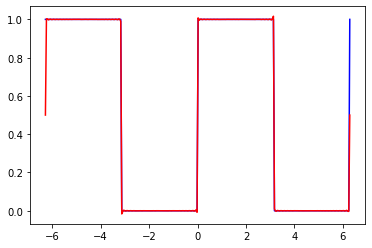

In [79]:
m = 1000
points = 300 # количество точек для построения графика

# нахождение значений исходной функции и ее разложением в ряд Фурье на интервале [-2π,2π)
t = list(np.linspace(-2*np.pi, 2*np.pi, points))
y1 = list(map(original_function, t))
y2 = list(map(lambda x: ft_function(m,x), t))


plt.plot(t, y1, 'b')
plt.plot(t, y2, 'r')
plt.show()

In [74]:
# вычисление максимальной абсолютной погрешности
delta = []
for p in zip(y1[50:-50],y2[50:-50]): #отбрасываем несколько крайних точек для более достоверного результата
    delta.append(abs(p[0]-p[1]))
print(max(delta))

0.1853955295041233


## Задача №2
Реализовать код проверки на четность.

Пусть дано N разрядное двоичное слово (или  массив  из N двоичных цифр 0 или 1)   проверочный (N) разряд по формуле:
$$(A_0+A_1+\ldots+A_{N-1}+A_N) \mod 2 = 0$$
$A_N$ выбирается таким образом, чтобы общая сумма равнялась нулю: если в N разрядном двоичном слове четное количество единиц, то он равен нулю и если нечетное, то  единице.

Проверить что при искажении одного или  нечётного количества разрядов  с помощью проверочного разряда можно обнаружить ошибку.

### Решение

In [15]:
# добавление генератора псевдослучайных чисел
import random
random.seed()

In [16]:
# вычисление значения бита проверки на четность
def compute_even_bit(msg):
    sum = 0
    for digit in msg:
        sum += int(digit)
    return '0' if sum % 2 == 0 else '1'

In [17]:
# проверка на четность
# true если четность сохраняется <=> сообщение не содержит ошибок
# false в противном случае
def check_even(msg):
    expected = msg[-1]
    actual = compute_even_bit(msg[0:-1])
    return expected == actual

In [18]:
# искажение сообщения с вероятностью p для каждого бита
# искажение происходит в предположении, что ошибка не может возникнуть в бите проверки на четность
def add_errors(msg, p):
    errors = 0
    new_msg = ''
    for digit in msg[0:-1]:
        if random.random() <= p:
            new_msg += ('1' if digit == '0' else '0')
            errors+=1
        else:
            new_msg += digit
    new_msg += msg[-1]
    return (new_msg, errors)

In [19]:
#создание виджетов для пользовательского интерфейса
msg_input = widgets.Text(value='10110101', description='Сообщение:')
error_p_input = widgets.FloatSlider(value=0.65, min=0.0, max=1.0, step=0.05, description='Вероятность ошибки:')
msg_output = widgets.Text(description='Сообщение с битом четности:', disabled=True)
msg_err_output = widgets.Text(description='Искаженное сообщение:', disabled=True)
eval_button = widgets.Button(description='Проверить')
conclusion_output = widgets.Label(value='')

#обработка нажатия на кнопку
def on_eval_clicked(e):
    msg_output.value = msg_input.value + compute_even_bit(msg_input.value)
    errors = add_errors(msg_output.value, error_p_input.value)
    msg_err_output.value = f'{errors[0]} ({errors[1]} ошибок)'
    conclusion = check_even(errors[0])
    #вывод сообщения поясняющего результат проверки
    if not conclusion and errors[1] > 0:
        conclusion_output.value = 'В сообщении обнаружена ошибка (или нечетное число ошибок)'
    elif errors[1] == 0:
        conclusion_output.value = 'В сообщении нет ошибок'
    else:
        conclusion_output.value = 'Четное количество ошибок не было обнаружено'

eval_button.on_click(on_eval_clicked)

widgets.VBox([msg_input, msg_output, error_p_input, msg_err_output, eval_button, conclusion_output])

## Вывод

Было проведено разложение в ряд Фурье прямоугольного сигнала, была разработана программа для нахождения значения функции и наибольшего отклонения между суммой ряда и её исходным графиком.

Была разработана программа, позволяющая проверять наличие ошибок при передаче сообщения, состоящего из двоичного кода, путем реализации кода проверки на чётность. С использованием данного метода ошибки могут быть обнаружены, только если их количество нечётно.